# Monte Carlo Simulations: Diversification
---
Gokulakkannan Ak

## Summary & Methods:
----

This report includes a discussion of the use of Monte Carlo simulations to exhibit the importance of diversification in equity investment portfolios. It also contains a Python implementation of this to exhibit the topic. Here, the members of the S&P 500 index are gathered and used to be randomly chosen in each simulation for portfolio constructions containing different numbers of stocks. The implementation starts with 2 stocks and goes all the way up to 20, choosing random ones each time and creating 10,000 random portfolios. During this, the various metrics of returns, volatility, and Sharpe Ratio are calculated and stored. At the end, the average of each metric is taken for each number of stocks from 2 to 20 and plotted for visualization of the results.  

## Monte Carlo Simulations: Introduction
----

Monte Carlo simulations define a method to create random scenarios for analysis. This model is used to examine the risk and uncertainty of certain ideas, and it can be used in many areas outside of just finance. This technique is named after a popular gambling location in Monaco, for such ideas of chance and random outcomes are closely related to gambling games like dice and slot machines. It was first developed, however, by Stanislaw Ulam, a mathematician who played countless games and plotted their outcomes to identify the probability of winning. With this, this method of analytics has grown in popularity even among the financial sector, and it is now quite often used to determine the distributions of investment portfolios. The steps for this approach can be seen as follows:
- *Step 1: determine assets to be used.*


- *Step 2: Choose an increasing range of number of assets.*


- *Step 3: For each number in the above range, create many random simulations of the process.*
    - *For portfolio construction, this means creating random weights for the specified number of assets chosen above.*
    - *Also, calculate returns, risk, and other metrics such as Sharpe Ratio.*
    
    
- *Step 4: Find the average of the generated distributions for each metric at each number of assets of the chosen range.* 


- *Step 5: Examine the results (visualizations/analytics).*

## Diversification: Asset Allocation

The topic of asset allocation deals with finding optimal ways of placing one's capital into financial assets/securities. Optimal can mean different things under different investor preferences, needs, and constraints. However, a major issue in asset allocation and portfolio optimization is controlling the risk of the portfolio, which relates to the risk of the securities available for investing. Here, equities only are used as an example, but this works for any type of financial security/asset class. With this, a major component of asset allocation that is of great use to any investor attempting to manage risks efficiently is diversification. There is a common saying in investing: "Don't put all your eggs in one basket." This exhibits this idea well, for risk can be diversified away when allocating capital into more than one security only. Firms can have periods of unexpected events that may result in significant price changes on the downside, negatively affecting a portfolio. This means that if an investor has all of his or her capital into such a security, they may encounter themselves in a terrible situation that could have been avoided with diversification. Therefore, diversification lowers the risk of an investor losing all of their capital, for each firm does not necessarily receive negative effects from situations of other specific firms. Two main types of risk can be defined as a result of this discussion:
- **Systematic Market Risk:** 
    - *Ex: Federal Reserve decisions and international wars.*
    - *Can't be diversified away.*
    
    
- **Idiosyncratic (Random) Risk:**
    - *Company specific factor such as an unexpected event.*
    - *Can be diversified away.*

## Tools of Implementation: Python

As one of the most popular programming languages in finance, Python offers great utility for financial analytical problems such as this one. It contains many useful packages that are able to help automate analytical processes for useful insights. The following packages are used:
- **Pandas**: data manipulation and tabular related analytics. 
- **Pandas-datareader**: stock price data gathering.
- **NumPy**: mathematical and vectorized processes.
- **Matplotlib** and **Seaborn**: visualization tools.

# Implementation: Python Code
-----

- Before starting the Monte Carlo Simulation and portfolio constructions, the necessary packages previously discussed need to be imported:

In [1]:
#Packages Needed:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

%matplotlib inline

- Now, some of the S&P 500 members can be gathered using Pandas and its "read_csv" method from a csv file containing the symbols. Also, the names need to be adjusted into the symbol only format away from any other text:

In [2]:
#Read in SPX Members:
path = 'spx_names.csv'
spx_names = pd.read_csv(path)

#Adjust Ticker names to a list:
stocks = [stock[0] for stock in spx_names.Symbols.str.split()]
stocks[:10]

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE']

- With the stock names ready, the price data can be gathered using Pandas-DataReader. Data since 2019 will be used along with the source "stooq," which actively offers data of this kind:

In [3]:
#Gather price data for above stock names:
start = '2019-01-01'
end = '2022-02-01'
source = 'stooq'
data = web.DataReader(stocks, source, start, end).Close
data.head()

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
2019-01-02,63.9468,31.964,146.370,38.1048,73.4996,69.8045,65.1883,133.162,224.57,79.6264,...,18.3746,100.260,43.5668,55.8054,36.6267,63.3840,85.1494,99.4522,156.24,36.9908
2019-01-03,61.5921,29.582,150.927,34.3094,71.0791,68.7919,62.1095,128.579,215.70,74.8166,...,18.9990,99.267,43.3972,54.9486,36.6446,61.2101,83.0074,97.6364,146.88,36.7843
2019-01-04,63.7236,31.529,147.165,35.7729,73.3691,69.5896,63.8833,133.619,226.19,76.6332,...,19.6469,103.280,43.8203,56.9753,37.7093,63.7901,85.1681,100.9750,152.97,37.9142
2019-01-07,65.0759,32.425,149.337,35.6911,74.4401,70.0850,64.8375,134.085,229.26,77.1135,...,20.0378,105.120,43.6319,57.2710,38.3841,62.8473,85.0744,101.0150,155.29,38.0667
2019-01-08,66.0315,31.904,148.295,36.3711,74.7854,70.8351,64.0616,137.488,232.68,78.9962,...,20.1579,108.420,44.1360,57.6872,38.1251,63.4375,84.9069,98.7474,156.33,38.4121


- The components for the Monte Carlo Simulation can now be prepared. A list is needed for the number of stocks to be used, which is 2 to 20 as previously named. Then a set number of simulations is needed as well, and it is set as 10,000 here to give a good distribution. Lastly, empty lists are needed to store the average volatility, return, and Sharpe Ratio of each iteration of the number of stocks:

In [4]:
num_stocks = list(range(2,21))  #Number of stocks each iteration
sims = 10000                    #Simulations

#Lists to store Average returns/volatilities/Sharpe for each:
rets = []
vols = []
sr = []

- With the necessary components set up, the for loops needed can be built to generate the simulations. Two loops are needed, one for each number of stocks and one for the 10000 simulations each time. For each one of the number of stocks, empty lists are needed once more to store the temporary returns, volatilities, and Sharpe Ratios of each randomly generated portfolio of the 10,000 simulations. For this, each needs to be calculated, which Python, Pandas, and NumPy makes it easy to do with its various methods. At the end, the average of each metric is taken and added to the original empty lists made above.


- Keep in mind, these are a lot of simulations, so the code takes some time to run. If replicated, smaller numbers/ranges may be better suited:

In [5]:
#Loop for simulations 2 to 20 number of stocks:
for num in num_stocks:
    
    #To keep each simulations Returns/Volatilities:
    sim_rets = []
    sim_vols = []
    sim_sr = []
    
    #Singular simulation of 10000 portfolios for num of stocks:
    for _ in range(sims):
        
        #Get random num amount of stock locations:
        rand_stocks = np.random.permutation(len(stocks[:283]))[:num]
        temp_df = data.iloc[:, rand_stocks]  #select above stocks only
        
        #Calculate weights:
        ws = np.random.rand(num)   #Random num amount of weights
        ws = ws / ws.sum()         #Normalize to add to 1
        
        #Portfolio returns:
        returns = temp_df.resample('Y').last().pct_change().mean()  #Annual return
        return_df = np.dot(returns, ws)  #portfolio return
        sim_rets.append(return_df)       #add to list to later calculate average
        
        #Portfolio Volatilities:
        cov = temp_df.pct_change().cov()        #Covariance matrix
        var = np.dot(ws.T, np.dot(cov, ws))     #variance = weights.T*Cov*weights
        yearly_vol = np.sqrt(var)*np.sqrt(252)  #Std = sqrt(var), times sqrt(252) gives annual vol
        sim_vols.append(yearly_vol)             #Add it to list for later average calc.
        
        #Portfolio Sharpe:
        sharpe = (return_df - 0.01) / yearly_vol  #(Returns - risk-free rate) / volatility
        sim_sr.append(sharpe)                     #Add to list for later average calc.

    #Find average portfolio return/volatility/sharpe from 10,000 runs:
    #Returns:
    avg_ret = np.mean(sim_rets)  #Average
    rets.append(avg_ret)         #Add to original empty list
    
    #Volatilities:
    avg_vol = np.mean(sim_vols)  #Average
    vols.append(avg_vol)         #Add to original empty list
    
    #Sharpe Ratios:
    avg_sr = np.mean(sim_sr)   #Average
    sr.append(avg_sr)          #Add to original empty list

- With all of the Monte Carlo Simulations done and the averages taken, each metric can be plotted against the number of stocks to examine how diversification affects the portfolios and its asset allocation metrics. This can be done with matplotlib and seaborn's tools for simple line plots. First, the returns can be plotted:

Text(0, 0.5, 'Return of Portfolio')

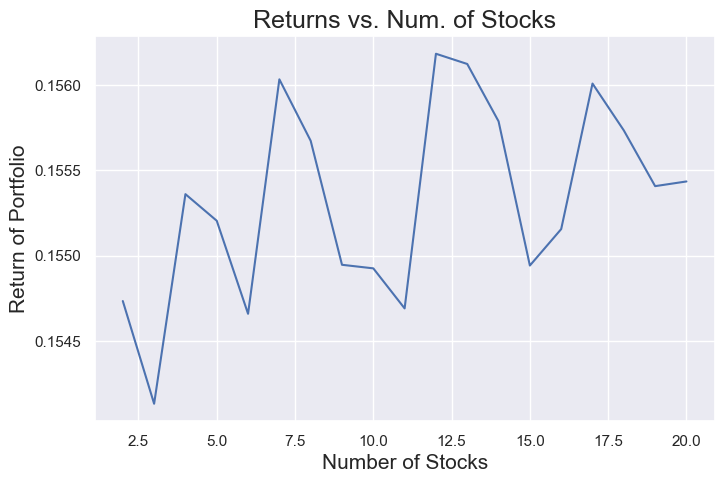

In [6]:
#Apply style of seaborn:
sea.set_theme()

#Returns vs. Number of stocks:
plt.figure(figsize=(8,5))  

#Lineplot with Seaborn:
sea.lineplot(x=num_stocks, y=rets)

#Adding proper title and labels:
plt.title('Returns vs. Num. of Stocks', fontsize=18)
plt.xlabel('Number of Stocks', fontsize=15)
plt.ylabel('Return of Portfolio', fontsize=15)

- With the average returns plotted for each number of stocks contained in the portfolio, it can be seen how it behaves as the number of stocks increases from 2. The returns oscillate quite a bit at first but end up converging towards the middle and a more controlled level. This is so because as diversification increases, the portfolio approximates to the level of a benchmark such as the S&P 500 index. This causes the portfolio to basically reach the same expected returns as a market benchmark when the number of stocks is increased to certain levels. Returns can be much lower or higher without diversification because allocation is more concentrated into fewer stocks, which may have high price movements. This, of course, is not good for risk control. 


- Next, the volatilities can be visualized in the same way:

Text(0, 0.5, 'Volatility of Portfolio')

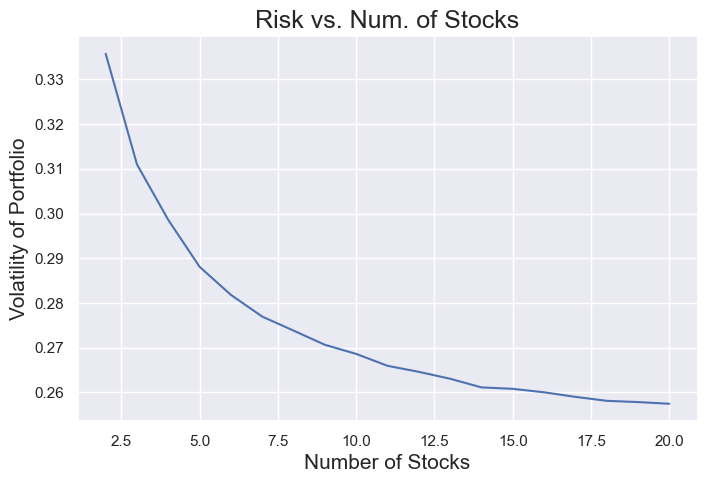

In [7]:
#Volatilities vs. Number of stocks:
plt.figure(figsize=(8,5))  

#Lineplot with Seaborn:
sea.lineplot(x=num_stocks, y=vols)

#Adding proper title and labels:
plt.title('Risk vs. Num. of Stocks', fontsize=18)
plt.xlabel('Number of Stocks', fontsize=15)
plt.ylabel('Volatility of Portfolio', fontsize=15)

- This line graph is what really depicts the topic discussed in this report. It can be seen how the idiosyncratic risk of individual firms is diversified away as more stocks receive allocation. This is so as chances of one firm's unexpected events of significant price changes affecting the overall portfolio diminishes with less capital allocated to that firm. It is also worth to note that while the risk lowers throughout, it does start to do so at a lower rate once a certain point is reached. This exhibits once more that the benchmark market metrics are being attained as greater diversification is used. This means that, essentially, it does not matter how many more stocks one adds after a certain point, for the market/benchmark will be attained in terms of metrics. 


- Finally, the last measure used can be visualized as well:

Text(0, 0.5, 'Sharpe Ratio of Portfolio')

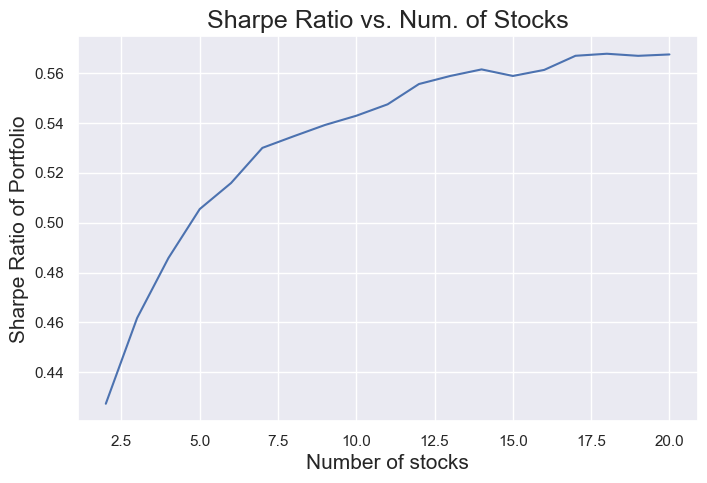

In [8]:
#Sharpe Ratio vs. Number of stocks:
plt.figure(figsize=(8,5))

#Lineplit with Seaborn:
sea.lineplot(x=num_stocks, y=sr)

#Adding proper title and labels:
plt.title('Sharpe Ratio vs. Num. of Stocks', fontsize=18)
plt.xlabel('Number of stocks', fontsize=15)
plt.ylabel('Sharpe Ratio of Portfolio', fontsize=15)

- It can be clearly seen that the Sharpe Ratio has the opposite result as the volatility of the portfolio with an increase in number of stocks. As stocks included increase, so does the Sharpe Ratio of the portfolio. The Sharpe Ratio exhibits the return of an investment relative to its risk and compared to a risk-free rate of return, so it only makes sense that it becomes higher as risk is diversified away with a larger number of stocks being added. With idiosyncratic risk being diversified, the Sharpe Ratio is able to grow as volatility decreases. 

# Conclusion:
----

As the implementation concludes, it can be seen how Monte Carlo simulations are useful in a financial setting of asset allocation/portfolio optimization. This technique is particularly useful to examine specific metrics under certain conditions as seen through chosen number of stocks. Furthermore, the significant idea of diversification in asset allocation is clearly depicted, for it can be seen how investors are able to diversify significant amounts of risk away due to firm specific idiosyncratic volatility. On the other hand, the portfolio returns relative to its risk is also able to be significantly improved as seen through the Sharpe Ratio progression. With this, investors must seek diversification and inclusion of multiple assets in order to avoid unnecessary risk of holding a small number of securities in their portfolios. 



As a next step, Monte Carlo can be used to find average minimum risk, maximum return, and maximum Sharpe Ratio portfolios. They can then be plotted on an efficient frontier to show which portfolios are optimal, exhibiting another use of this technique in asset allocation. This can be used to find specific portfolio weights for assets, which is useful for investors to know how much capital to place in each security. Also, the topics of asset betas and hedging can be included as well, which are industry popular tools being used to further examine risk and control it.  